#### In this step, we will read both the datasets (Fake.csv, True.csv) perform some data cleaning, merge both the datasets and shuffle the final dataset.

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

df_fake = pd.read_csv("E:\Fake.csv")
df_fake.head()

[nltk_data] Downloading package stopwords to C:\Users\digvijay
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [2]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#### As we only need title and text, so we will drop extra features i.e., subject and date.

In [3]:
# dropping unneccesary features
df_fake=df_fake.drop(['subject','date'],axis=1)

# assigning label 'FAKE' by creating target column i.e., label
df_fake['label'] ='FAKE' 

df_fake.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,FAKE


#### Similarly, we will be processing the True dataset and further merging it with the df_fake data frame to create the final dataset.

In [4]:
df_true = pd.read_csv("E:\True.csv")
df_true=df_true.drop(['subject','date'],axis=1)
df_true['label']='TRUE'

df= pd.concat([df_true, df_fake], ignore_index=True)
df.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


#### So, we have merged the dataset, but the dataset has a defined sequence of True and Fake labels. So, therefore we need to shuffle the dataset to introduce a randomness in the dataset.

In [5]:
#shuffling the dataset
df=df.reindex(np.random.permutation(df.index))
df.head()

,title,text,label
21378,Cambodia accuses U.S. of political interferenc...,PHNOM PENH (Reuters) - Cambodia hit back on Th...,TRUE
43067,HILLARY’S IMMORAL REIGN AS SEC. STATE: U.S. So...,Does anyone care? If Hillary personally gassed...,FAKE
20560,South Korea braces for possible new missile te...,SEOUL (Reuters) - South Korea braced for a pos...,TRUE
34849,ALL KIDDING ASIDE…DID HILLARY JUST HAVE A SEIZ...,Whoa! We asked the question yesterday in more ...,FAKE
38971,JUST IN: OBAMA APPOINTED JUDGE Presiding Over ...,"Now, a Clinton appointed judge who took Flynn ...",FAKE


#### From the dataset, we can observe that True news text contains the source of the news also i.e., 3rd row of True News text starts from BERLIN (Reuters) –, whereas 4th row of True News text starts from (Reuters) –

#### So, we have to clean the True News text as it affects the model building process as it’s not an important feature for building a fake news detection model.

#### Therefore, we have to write look ahead regular expression to retain only the text followed by “(Reuters) –“. The code for regular expression-based extraction is shared below:

In [6]:
import re
# function for extracting desired text using regex
def extract_txt(text):
    regex = re.search(r"(?<=\(Reuters\)\s\-\s).*",text)
    if regex:
        return regex.group(0)
    return text
#applying regex function to retain only relevant text
df['text_processed'] = df['text'].apply(extract_txt)

#checking dataframe containing only True News
df[df.label=="TRUE"]

,title,text,label,text_processed
21378,Cambodia accuses U.S. of political interferenc...,PHNOM PENH (Reuters) - Cambodia hit back on Th...,TRUE,Cambodia hit back on Thursday at U.S. criticis...
20560,South Korea braces for possible new missile te...,SEOUL (Reuters) - South Korea braced for a pos...,TRUE,South Korea braced for a possible further miss...
5966,"After talks, Mexico says at 'impasse' with Tru...",MEXICO CITY (Reuters) - Mexico and the United ...,TRUE,Mexico and the United States will be stuck at ...
20382,Factbox: Norway's close-fought election for pa...,OSLO (Reuters) - Norwegians vote on Sept. 10 a...,TRUE,Norwegians vote on Sept. 10 and 11 to pick a p...
16789,Eleven killed in clashes in Ethiopia's Oromiya...,ADDIS ABABA (Reuters) - Ethnic clashes killed ...,TRUE,Ethnic clashes killed 11 people this week in E...
...,...,...,...,...
11560,China considers punishing those who slander he...,BEIJING (Reuters) - China is considering a law...,TRUE,China is considering a law punishing those who...
2568,Trump gives Boy Scouts at jamboree a taste of ...,"GLEN JEAN, West Virginia (Reuters) - After ano...",TRUE,"After another challenging day in Washington, P..."
17644,"Palestinian rivals Fatah, Hamas sign reconcili...",GAZA/CAIRO (Reuters) - Rival Palestinian facti...,TRUE,Rival Palestinian factions Hamas and Fatah sig...
16477,U.S. House passes sanctions on Iran-backed Hez...,WASHINGTON (Reuters) - The U.S. House of Repre...,TRUE,The U.S. House of Representatives on Wednesday...


#### So, as we can see from the above dataset, the text with the True label is cleaned now. Next, we will be using this combined dataset for building the LSTM model.

## Data Cleaning & Preparation

#### Firstly we will convert the target variable label into binary variable 0 for True news and 1 for Fake news.

In [7]:

#df["label"] = df.label.apply(lambda  x:0 if x=='TRUE' else 1)
#df.head()
df["label"]=encoder.fit_transform(df["label"])
df

,title,text,label,text_processed
21378,Cambodia accuses U.S. of political interferenc...,PHNOM PENH (Reuters) - Cambodia hit back on Th...,1,Cambodia hit back on Thursday at U.S. criticis...
43067,HILLARY’S IMMORAL REIGN AS SEC. STATE: U.S. So...,Does anyone care? If Hillary personally gassed...,0,Does anyone care? If Hillary personally gassed...
20560,South Korea braces for possible new missile te...,SEOUL (Reuters) - South Korea braced for a pos...,1,South Korea braced for a possible further miss...
34849,ALL KIDDING ASIDE…DID HILLARY JUST HAVE A SEIZ...,Whoa! We asked the question yesterday in more ...,0,Whoa! We asked the question yesterday in more ...
38971,JUST IN: OBAMA APPOINTED JUDGE Presiding Over ...,"Now, a Clinton appointed judge who took Flynn ...",0,"Now, a Clinton appointed judge who took Flynn ..."
...,...,...,...,...
2568,Trump gives Boy Scouts at jamboree a taste of ...,"GLEN JEAN, West Virginia (Reuters) - After ano...",1,"After another challenging day in Washington, P..."
17644,"Palestinian rivals Fatah, Hamas sign reconcili...",GAZA/CAIRO (Reuters) - Rival Palestinian facti...,1,Rival Palestinian factions Hamas and Fatah sig...
40574,JESSE WATTERS Takes On Young Anti-Trump Protes...,,0,
16477,U.S. House passes sanctions on Iran-backed Hez...,WASHINGTON (Reuters) - The U.S. House of Repre...,1,The U.S. House of Representatives on Wednesday...


#### As we have to analyze the whole news article so we have to combine both title and text_processed features. Further, we have to drop unnecessary features i.e., title, text, and text_processed features from the dataset as we have to use only the final combined news column for building the model.

In [8]:
#combining text_processed and title for creating full news article with headline
df['final_news'] = df['title'] + " " + df['text_processed']

# now we can delete extra columns 
cols_del =['title','text','text_processed']
df = df.drop(cols_del,axis=1)

df.head()

,label,final_news
21378,1,Cambodia accuses U.S. of political interferenc...
43067,0,HILLARY’S IMMORAL REIGN AS SEC. STATE: U.S. So...
20560,1,South Korea braces for possible new missile te...
34849,0,ALL KIDDING ASIDE…DID HILLARY JUST HAVE A SEIZ...
38971,0,JUST IN: OBAMA APPOINTED JUDGE Presiding Over ...


#### In the next step, lowercase the data, although it is commonly overlooked, it is one of the most effective techniques when the data is small. Although the word ‘Good’, ‘good’ and ‘GOOD’ are the same but the neural net model will assign different weights to it resulting in abrupt output which will affect the overall performance of the model.

In [9]:
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')

def cleanText(txt):
  # lowercaing
    txt = txt.lower()
  # removing stopwords
    txt = ' '.join([word for word in txt.split() if word not in (stop)])
  # removing non-alphabetic characters
    txt = re.sub('[^a-z]',' ',txt)
    return txt  

#applying text cleaning function to clean final_news
df['final_news'] = df['final_news'].apply(cleanText)
df.head()

,label,final_news
21378,1,cambodia accuses u s political interference ...
43067,0,hillary s immoral reign sec state u s sold ...
20560,1,south korea braces possible new missile test m...
34849,0,kidding aside did hillary seizure middle q j...
38971,0,in obama appointed judge presiding michael fl...


In [10]:
df.isnull().sum()

label         0
final_news    0
dtype: int64

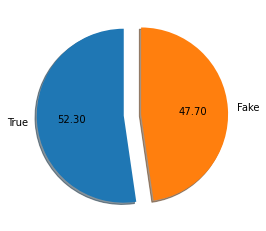

In [11]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['True','Fake'],explode = (0.1, 0.1),autopct="%0.2f",shadow=True,startangle=90)
plt.show()

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\digvijay
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
df['num_characters']=df['final_news'].apply(len)

In [14]:
df.head()

,label,final_news,num_characters
21378,1,cambodia accuses u s political interference ...,2401
43067,0,hillary s immoral reign sec state u s sold ...,3343
20560,1,south korea braces possible new missile test m...,5310
34849,0,kidding aside did hillary seizure middle q j...,456
38971,0,in obama appointed judge presiding michael fl...,896


In [15]:
df['num_words']=df['final_news'].apply(lambda x:len(nltk.word_tokenize(x)))

In [16]:
df.head()

,label,final_news,num_characters,num_words
21378,1,cambodia accuses u s political interference ...,2401,328
43067,0,hillary s immoral reign sec state u s sold ...,3343,414
20560,1,south korea braces possible new missile test m...,5310,730
34849,0,kidding aside did hillary seizure middle q j...,456,63
38971,0,in obama appointed judge presiding michael fl...,896,119


In [17]:
df['num_sentences']=df['final_news'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [18]:
df.tail()

,label,final_news,num_characters,num_words,num_sentences
2568,1,trump gives boy scouts jamboree taste washingt...,1961,288,1
17644,1,palestinian rivals fatah hamas sign reconcili...,4258,531,1
40574,0,jesse watters takes young anti trump protester...,88,13,1
16477,1,u s house passes sanctions iran backed hezbol...,1709,210,1
11526,1,russia says troops took part syria camp...,173,23,1


In [19]:
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,44898.000000,44898.000000
mean,1886.217783,252.909484
std,1622.053851,213.458390
min,29.000000,3.000000
25%,979.000000,133.000000
50%,1659.000000,224.000000
75%,2347.750000,315.000000
max,40262.000000,5134.000000


In [20]:
df[df['label']==0][['num_characters','num_words']].describe()

,num_characters,num_words
count,23481.000000,23481.000000
mean,1921.092543,259.951322
std,1886.032295,247.075294
min,29.000000,3.000000
25%,1118.000000,154.000000
50%,1624.000000,222.000000
75%,2260.000000,306.000000
max,40262.000000,5134.000000


In [21]:
df[df['label']==1][['num_characters','num_words']].describe()

,num_characters,num_words
count,21417.000000,21417.000000
mean,1847.982070,245.189009
std,1270.069483,168.756759
min,30.000000,4.000000
25%,735.000000,98.000000
50%,1719.000000,227.000000
75%,2480.000000,328.000000
max,19894.000000,2730.000000


In [22]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

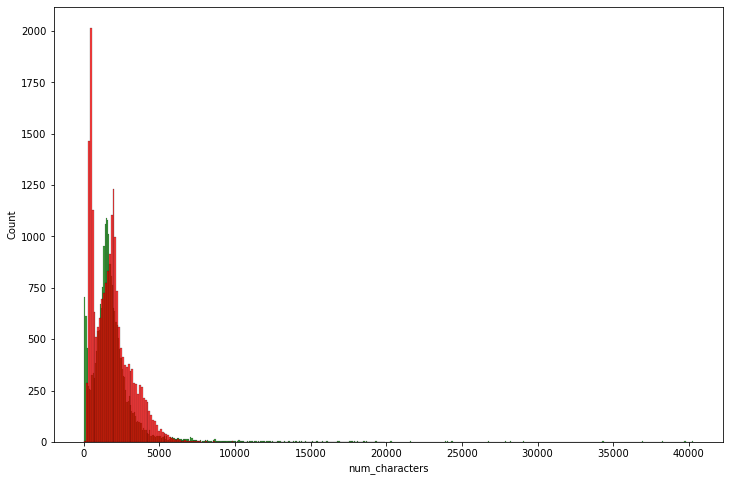

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label']==0]['num_characters'],color='green')
sns.histplot(df[df['label']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

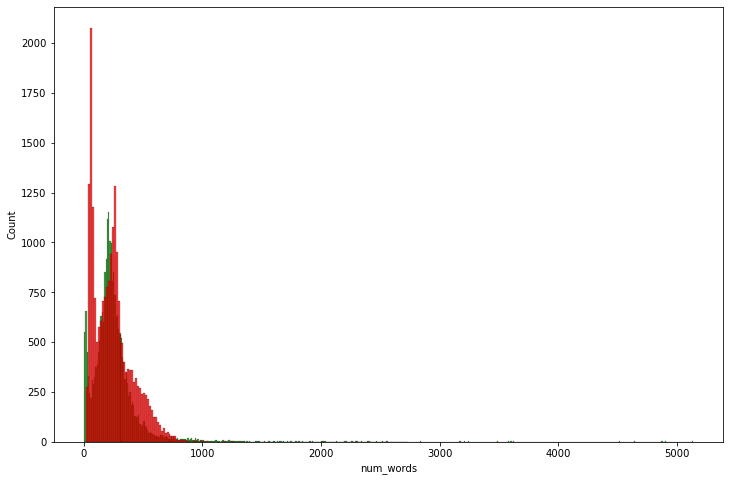

In [24]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label']==0]['num_words'],color='green')
sns.histplot(df[df['label']==1]['num_words'],color='red')

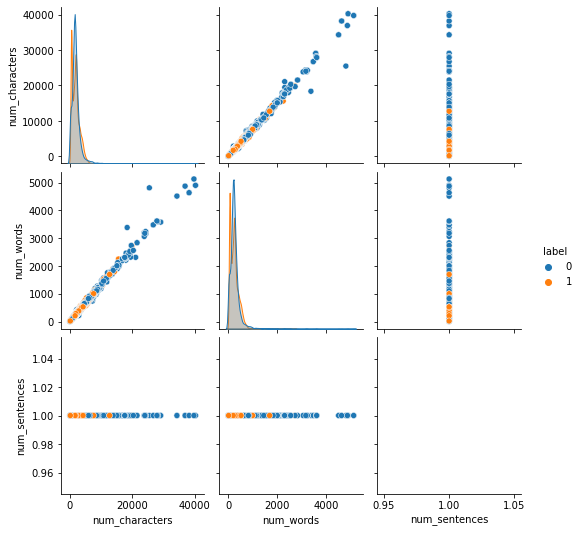

In [25]:
sns.pairplot(df,hue='label')

<AxesSubplot:>

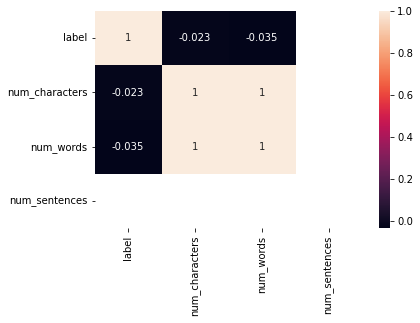

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
from nltk.stem import PorterStemmer,SnowballStemmer
from collections import Counter
import string
ps = PorterStemmer()

In [28]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]        
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [29]:
spam_corpus= []
for msg in df[df['label']==1]['final_news'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [30]:
len(spam_corpus)

5249690

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


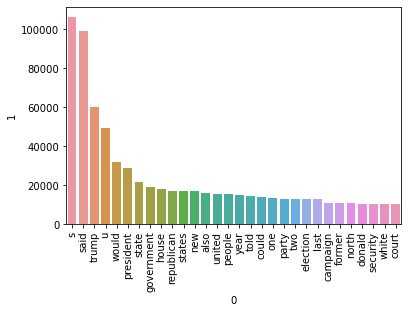

In [31]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [32]:
ham_corpus = []
for msg in df[df['label'] == 0]['final_news'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [33]:
len(ham_corpus)

6100942

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


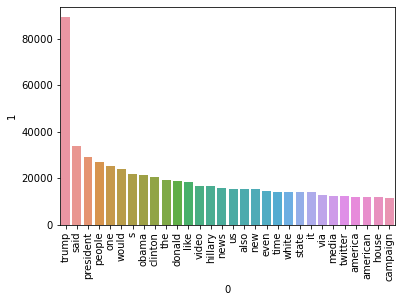

In [34]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [36]:
X = tfidf.fit_transform(df['final_news']).toarray()

In [37]:
X.shape

(44898, 3000)

In [38]:
y = df['label'].values

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [42]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [43]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.921826280623608
[[4489  242]
 [ 460 3789]]
0.9399652691639792


In [44]:
from sklearn.svm import SVC

In [45]:
svc = SVC(probability=True ,kernel='poly', degree=3)

In [48]:
#def train_classifier(clf,X_train,y_train,X_test,y_test):
    #clf.fit(X_train,y_train)
    #y_pred = clf.predict(X_test)
    #accuracy = accuracy_score(y_test,y_pred)
    #precision = precision_score(y_test,y_pred)
    
    #return accuracy,precision

In [49]:
bnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.921826280623608
[[4489  242]
 [ 460 3789]]
0.9399652691639792


In [50]:
mnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.921826280623608
[[4489  242]
 [ 460 3789]]
0.9399652691639792


In [51]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [52]:
abc.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.921826280623608
[[4489  242]
 [ 460 3789]]
0.9399652691639792


In [53]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [54]:
etc.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.921826280623608
[[4489  242]
 [ 460 3789]]
0.9399652691639792
